## 01. Sine 파
---

- `sine(사인)파`는 일정 주파수와 진폭을 갖는 주기 함수
- `y = A * sin(2*pi*f*t + phi)`
- `A`는 진폭, `f`는 주파수, `t`는 시간, `phi`는 위상 차이를 나타냄



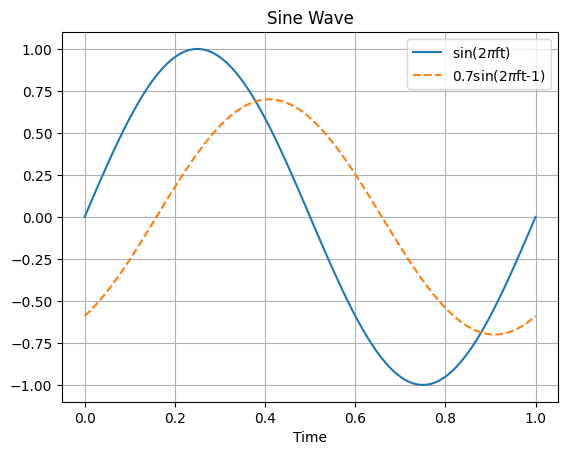

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 시간(t), 주파수(f) 초기화
t = np.linspace(0,1,100)
f = 1   # 1 Hz

# sin 함수를 이용하여 그래프 그리기
plt.plot(t, 1 * np.sin(2*np.pi*f*t + 0), "-", label='sin(2$\pi$ft)')    # 선 모양 그래프
plt.plot(t, 0.7 * np.sin(2*np.pi*f*t - 1), ls="--", label='0.7sin(2$\pi$ft-1)')   # 점선 모양 그래프

plt.xlabel("Time")
plt.title("Sine Wave")
plt.legend();plt.grid();plt.show()

### fade in, fade out 기능 구현

- `fade_io` 함수는 데이터 배열에 페이드 인과 페이드 아웃을 적용하는 함수입니다.
이 함수는 선형적으로 증가하는 값과 감소하는 값을 생성하여 데이터의 처음과 끝 부분을 부드럽게 조정합니다.

In [2]:
def fade_io(data, length = 1000):
    # 0에서 1까지 선형적으로 증가하는 값 생성
    fade_in_data = np.linspace(0, 1, length)

    # Fade-in 적용
    data[:length] *= fade_in_data

    # 1에서 0까지 선형적으로 감소하는 값 생성
    fade_out_data = np.linspace(1, 0, length)

    # Fade-out 적용
    data[-length:] *= fade_out_data
    return data

### Sine파 들어보기

In [3]:
# 주파수와 실행시간을 인자로 받는 Sine 톤 함수 만들기

def sine_tone(f, duration=0.08, n=1280):
  t = np.linspace(0, duration, n)         #fs = 1280/0.08 = 16kHz
  data = np.sin(2*np.pi*f*t)
  length = 10**int(np.log10(duration*n))

  return fade_io(data = data, length = length)

### IPython.display.Audio 로 듣기

In [4]:
from IPython.display import Audio
Audio(sine_tone(300), rate=16000)